In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import pickle # For storing trained data

### Reading Ground truth CSV files

Read index file for filenames

In [112]:
df = pd.read_csv("ground_truth_subjects.csv", header = None)
print(df) # We get a dataframe containing names of files

                      0
0  Subject39_1526417507
1  Subject39_1526591202
2  Subject42_1527280030
3  Subject43_1527806941
4  Subject54_1539288817
5  Subject55_1539459892


Make array of Folder names of Dataset

In [113]:
subjects = df[0].values
print(subjects)

['Subject39_1526417507' 'Subject39_1526591202' 'Subject42_1527280030'
 'Subject43_1527806941' 'Subject54_1539288817' 'Subject55_1539459892']


Get list of paths to training + testing CSV files

In [114]:
def get_file_paths(subjects):
    # List that stores path to CSV training files
    file_paths = [] # Initiated list for storing path to dataset
    for subject in subjects:
        # ground_truth -> subject -> peizo signals
        piezo_path = f"ground_truth/{subject}/{subject[10:]}.csv"
        # ground_truth -> subject -> breathrates
        breath_path = f"ground_truth/{subject}/breathrates.csv"
        # ground_truth -> subject -> heartrates
        heart_path = f"ground_truth/{subject}/heartrates.csv"
        # ground_truth -> subject -> jpeaks
        jpeaks_path = f"ground_truth/{subject}/jpeaks.csv"
        # ground_truth -> subject -> movementvalues
        movment_path = f"ground_truth/{subject}/movementvalues.csv"
        file_paths.append((piezo_path, breath_path, heart_path, jpeaks_path, movment_path))
    return file_paths

# Training + Testing dataset addresses stored
file_paths = get_file_paths(subjects)
print(file_paths)

[('ground_truth/Subject39_1526417507/1526417507.csv', 'ground_truth/Subject39_1526417507/breathrates.csv', 'ground_truth/Subject39_1526417507/heartrates.csv', 'ground_truth/Subject39_1526417507/jpeaks.csv', 'ground_truth/Subject39_1526417507/movementvalues.csv'), ('ground_truth/Subject39_1526591202/1526591202.csv', 'ground_truth/Subject39_1526591202/breathrates.csv', 'ground_truth/Subject39_1526591202/heartrates.csv', 'ground_truth/Subject39_1526591202/jpeaks.csv', 'ground_truth/Subject39_1526591202/movementvalues.csv'), ('ground_truth/Subject42_1527280030/1527280030.csv', 'ground_truth/Subject42_1527280030/breathrates.csv', 'ground_truth/Subject42_1527280030/heartrates.csv', 'ground_truth/Subject42_1527280030/jpeaks.csv', 'ground_truth/Subject42_1527280030/movementvalues.csv'), ('ground_truth/Subject43_1527806941/1527806941.csv', 'ground_truth/Subject43_1527806941/breathrates.csv', 'ground_truth/Subject43_1527806941/heartrates.csv', 'ground_truth/Subject43_1527806941/jpeaks.csv', 'gro

# Visualising the data

Individual plots of peizo then breathrates

In [ ]:
for (piezo_path, breath_path, heart_path, jpeaks_path, movment_path) in file_paths:
    piezo_df = pd.read_csv(piezo_path, header = None)
    breathrate_df = pd.read_csv(breath_path, header = None)
    heartrate_df = pd.read_csv(heart_path, header = None)
    jpeaks_df = pd.read_csv(jpeaks_path, header = None)
    movment_df = pd.read_csv(movment_path, header = None)
    
    # Get values out of dataframes

    # Peizo
    piezo_reading = piezo_df[0].values
    # Breathrates
    timestamps = breathrate_df[0].values
    breath_rate = breathrate_df[1].values
    # Heartrates
    heart_rate = heartrate_df[1].values
    # jpeaks
    j_peak = jpeaks_df[0].values
    # movement_values
    movment_value = movment_df[1].values

    # Plot the Data
    # 3 lines below are just to resize the graph, No need to consider
    f = plt.figure()
    f.set_figwidth(5)
    f.set_figheight(5)
    

    plt.plot(piezo_reading)
    plt.show()
    plt.plot(timestamps, breath_rate, marker = 'o')
    plt.show()
    plt.plot(timestamps, heart_rate, marker = 'o')
    plt.show()
    plt.plot(j_peak, marker = 'o')
    plt.show()
    plt.plot(movment_value, marker = 'o')
    plt.show()

# All output in Folder: Data Plots\Individual quantities

### Plots for breathrate (First)
Note: Training data considered as 1st 4 datasets

1. By averaging out the piezo_values

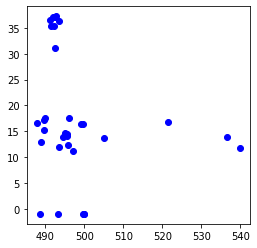

In [127]:
interval = 6780
cumu_breathrates = []
cumu_piezo = []
# For 1st 4 datasets
for sub in range(4):
    # if (sub == 1) :
    #     continue
    piezo_0 = pd.read_csv(file_paths[sub][0], header = None).iloc[:, 0].values # Numpy 1D array
    breathrates = pd.read_csv(file_paths[sub][1], header = None).iloc[:, 1].values # Numpy 1D array
    
    cumu_breathrates += list(breathrates)
    x = [] # 8 membered list - Averaged out peizo

    for i in range(8):
        sum = 0
        count = 0
        for  j in range(interval):
            if (piezo_0[j + interval * i]>200):
                sum += piezo_0[j + interval * i]
                count += 1

        sum /= count
        x += [sum]
    
    cumu_piezo += x


# Just to get bigger graph
f = plt.figure()
# ----------------------RESIZE graph below-----------------------------
f.set_figwidth(4)
f.set_figheight(4)

plt.scatter(np.array(cumu_piezo), np.array(cumu_breathrates), color = "blue")
plt.show()


2. By populating breathrates into array of 54240

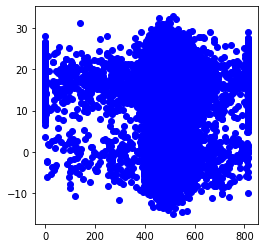

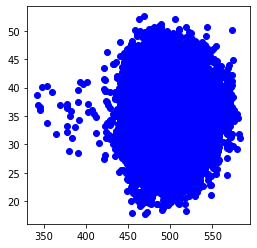

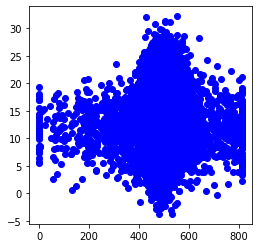

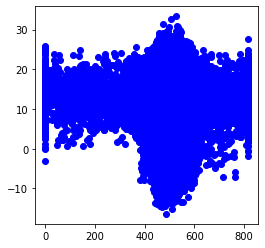

In [137]:
for data_number in range(4):
    piezo_atIndex = pd.read_csv(file_paths[data_number][0], header = None).iloc[:, 0].values # Numpy 1D array
    breathrates = pd.read_csv(file_paths[data_number][1], header = None).iloc[:, 1].values # Numpy 1D array

    interval = 6780
    y = []
    for breathrate in breathrates:
        # Get normal Dist for better results
        y += list(np.random.normal(breathrate, 4, interval))

    # Just to get bigger graph
    f = plt.figure()
    # ----------------------RESIZE graph below-----------------------------
    f.set_figwidth(4)
    f.set_figheight(4)

    # Plotting two values 
    plt.scatter(piezo_atIndex, np.array(y), color = "blue")
    plt.show()

# Training model

## Linear Regression (Using Scikit learn [for now])
For continuous data : Breathrates, Heartrates and jpeaks

### First try by Direct linear regression 
(Probably wrong as we need to remove the error datapoints)

In [138]:
interval = 6780 # 54240 / 8
X = []
y = []

for (peizo_path, breath_path, heart_path, jpeaks_path, movment_path) in file_paths:
    piezo_vals = pd.read_csv(peizo_path, header = None).iloc[:, 0:].values
    breathrates = pd.read_csv(breath_path, header = None).iloc[:, 1:].values
    
    X += list(piezo_vals)
    for breathrate in breathrates:
        y += list(np.random.normal(breathrate, 4, interval))

X = np.array(X)
y = np.array(y)

regressor = LinearRegression()
regressor.fit(piezo_0.reshape(1, -1), y.reshape(1, -1))

AttributeError: 'list' object has no attribute 'reshape'

In [ ]:
n = (len(piezo_0) // 8)
y = []
for breathrate in breathrates:
    y += list(np.random.normal(breathrate, 4, n))
    
y = np.array([y])
piezo_0 = [piezo_0]

regressor = LinearRegression()
regressor.fit(piezo_0, y)

MemoryError: Unable to allocate 21.9 GiB for an array with shape (54240, 54240) and data type float64

Using pickle to save state of the trained model

In [ ]:
# Testing out if pickle works
X = np.array([[7], [8], [7], [4], [2], [7], [3], [8], [5]])
y = np.array([17, 16, 25, 67, 56, 87, 34, 54, 23])
model = LinearRegression()
model.fit(X, y)
filename = 'finalized_model.sav'
pickle.dump(model, open(filename, 'wb'))

In [ ]:
saved_model = pickle.load(open(filename, 'rb'))
saved_model.predict(np.array([[9]]))

array([34.80555556])

## Classification
For discrete data : Movement values

# Done :)